In [1]:
from sklearn import ensemble, model_selection, metrics, datasets

import numpy as np
import pandas as pd
import xgboost as xgb

In [2]:
data = datasets.load_boston()

In [3]:
X = data.data

In [4]:
y = data.target

In [11]:
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [10]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [47]:
%%time
estimator = ensemble.RandomForestRegressor(n_estimators = 100, min_samples_split=3)
regressor = estimator.fit(X_train, y_train)

Wall time: 446 ms


In [48]:
metrics.mean_absolute_error(y_test, regressor.predict(X_test))

2.1862152262217216

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'random forest model')

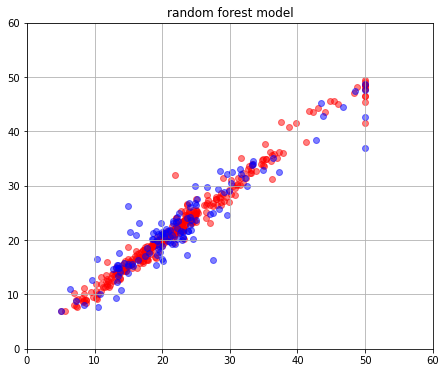

In [49]:
%pylab inline
pylab.figure(figsize=(16, 6))
pylab.subplot(1,2,2)
pylab.grid(True)
pylab.xlim(0,60)
pylab.ylim(0,60)
pylab.scatter(y_train, regressor.predict(X_train), alpha=0.5, color = 'red')
pylab.scatter(y_test, regressor.predict(X_test), alpha=0.5, color = 'blue')
pylab.title('random forest model')

In [101]:
XGBestimator = xgb.XGBRegressor(learning_rate=0.2, max_depth=5, n_estimators=100, min_child_weight=1)

In [102]:
XGBR = XGBestimator.fit(X_train, y_train)

In [103]:
metrics.mean_absolute_error(y_test, XGBR.predict(X_test))

2.2100465977285793

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'XGB regressor')

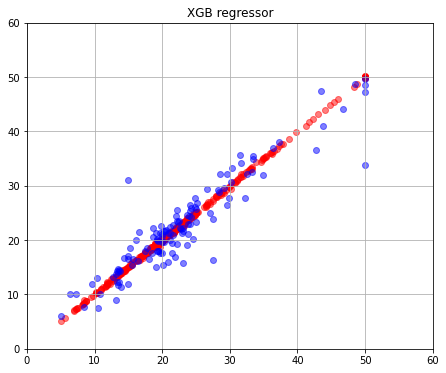

In [104]:
%pylab inline
pylab.figure(figsize=(16, 6))

pylab.subplot(1,2,2)
pylab.grid(True)
pylab.xlim(0,60)
pylab.ylim(0,60)
pylab.scatter(y_train, XGBR.predict(X_train), alpha=0.5, color = 'red')
pylab.scatter(y_test, XGBR.predict(X_test), alpha=0.5, color = 'blue')
pylab.title('XGB regressor')